# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

# Load Data

In [2]:
data = pd.read_csv("bank.csv" , delimiter=";")
data.shape

(4521, 17)

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Exploratory Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


# Age

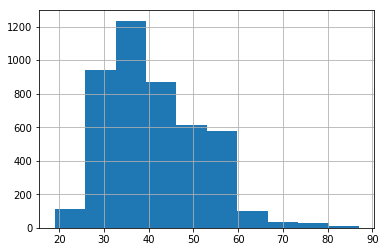

In [5]:
data.age.hist()

- Most clients have an age range between (25,60)
- Bank only interested in the working class?

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Job

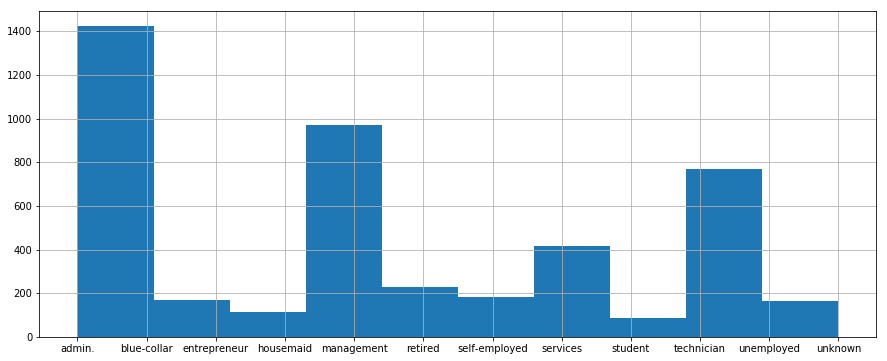

In [7]:
data.job.hist(figsize=(15 , 6))

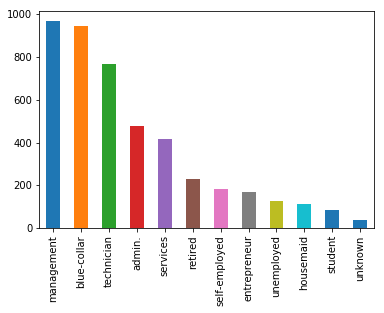

In [8]:
data.job.value_counts().plot(kind="bar")

In [9]:
data[data.job == "unknown"].shape

(38, 17)

In [10]:
data.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [11]:
data.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [12]:
data.job.nunique()

12

- Most popular target clients are in management and blue-collar jobs
- 38 clients have unknown jobs
- 84 clients are students

In [13]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')

## Marital

In [14]:
data.marital.nunique()

3

In [15]:
data.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

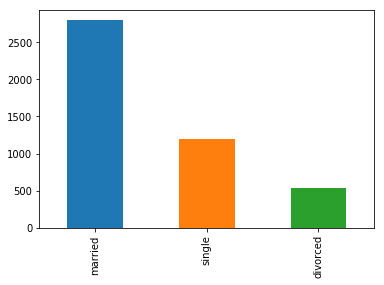

In [16]:
data.marital.value_counts().plot(kind="bar")

- Most of the contacted clients are married

## Education

In [17]:
data.education.nunique()

4

In [18]:
data.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

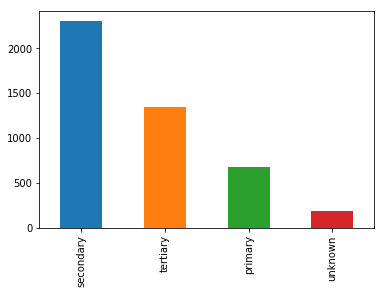

In [19]:
data.education.value_counts().plot(kind="bar")

- Most occuring category of clients have secondary education
- 187 clients have unknown education

In [20]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')

## Default

In [21]:
data.default.unique()

array(['no', 'yes'], dtype=object)

In [22]:
data.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

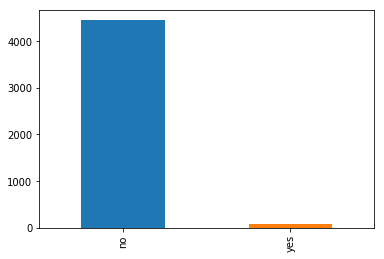

In [23]:
data.default.value_counts().plot(kind="bar")

- Most of our clients have no credit default

## Balance

In [24]:
data.balance.nunique()

2353

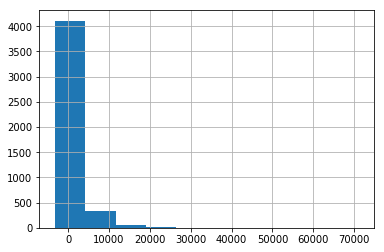

In [25]:
data.balance.hist()

- Most clients have a yearly balance between(0,5000)

In [26]:
data["target"] = data.y

In [27]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,no


In [28]:
data.drop("y" , axis=1 , inplace=True)

In [29]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


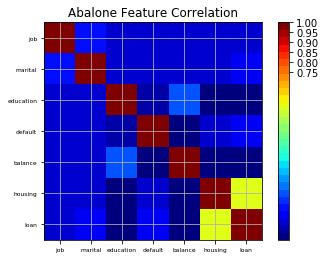

In [30]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(data)

## Housing

In [31]:
data.housing.nunique()

2

In [32]:
data.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

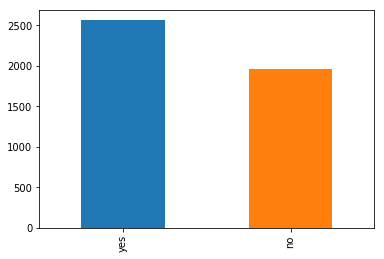

In [33]:
data.housing.value_counts().plot(kind="bar")

## Loan

In [34]:
data.loan.nunique()

2

In [35]:
data.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

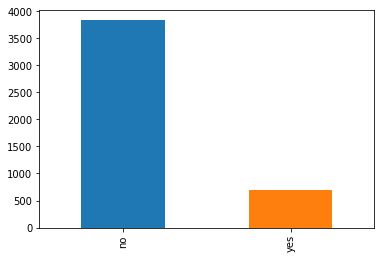

In [36]:
data.loan.value_counts().plot(kind="bar")

## Contact

In [37]:
data.contact.nunique()

3

In [38]:
data.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

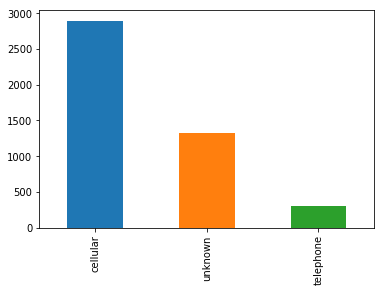

In [39]:
data.contact.value_counts().plot(kind="bar")

## Day

In [40]:
data.day.nunique()

31

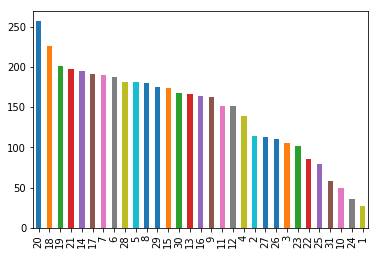

In [41]:
data.day.value_counts().plot(kind="bar")

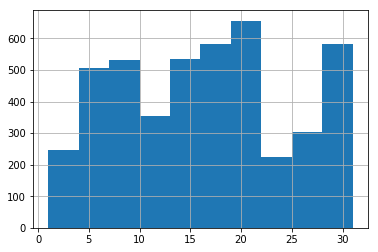

In [42]:
data.day.hist()

## Month

In [43]:
data.month.nunique()

12

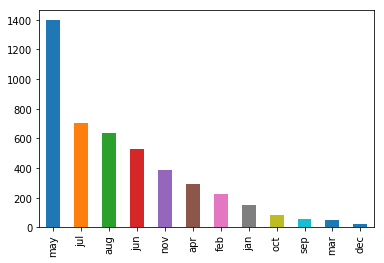

In [44]:
data.month.value_counts().plot(kind="bar")

## Duration

In [45]:
data.duration.nunique()

875

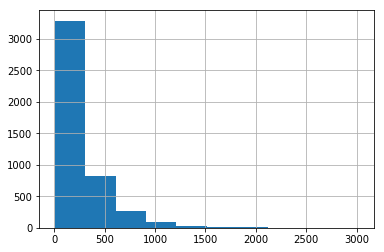

In [46]:
data.duration.hist()

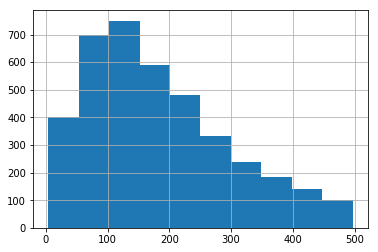

In [47]:
data[data.duration < 500].duration.hist()

- Most calls are between 0 to 250 sec (4 min)

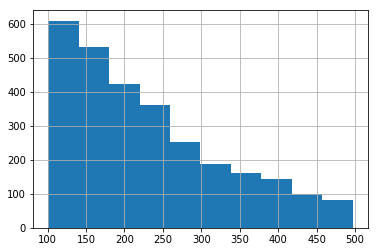

In [48]:
tab = data[data.duration < 500]
tab[tab.duration > 100].duration.hist()

In [49]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'target'],
      dtype='object')

## Campaign

In [50]:
data.campaign.nunique()

32

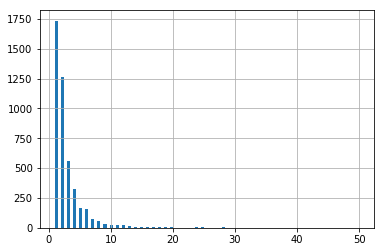

In [51]:
data.campaign.hist(bins=100)

## Pdays

In [52]:
data.pdays.nunique()

292

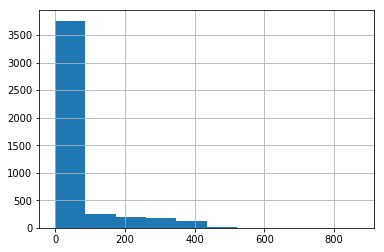

In [53]:
data.pdays.hist()

In [54]:
data[data.pdays == -1].shape

(3705, 17)

## Target Value

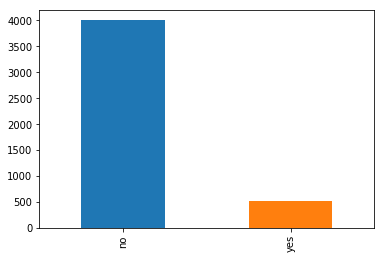

In [55]:
data.target.value_counts().plot(kind="bar")

In [56]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [57]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'target'],
      dtype='object')

In [58]:
data['is_new']= data.pdays

In [59]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,-1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,339
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,330
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,-1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,-1


In [60]:
def set_client(x):
    if (x== -1):
        return 1
    return 0

In [61]:
data.is_new = data.is_new.apply(set_client)

In [62]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1


In [63]:
data['is_job']= data.job

In [64]:
def set_job(x):
    if x == "unknown":
        return 0
    return 1

In [65]:
data["is_job"] = data.job.apply(set_job)

In [66]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1,1


In [67]:
data[data.job=="unknown"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
95,41,unknown,single,tertiary,no,1567,no,no,cellular,1,jul,291,2,-1,0,unknown,no,1,0
178,37,unknown,married,unknown,no,1699,no,no,unknown,9,jun,63,1,-1,0,unknown,no,1,0
230,52,unknown,married,secondary,no,142,no,no,cellular,25,aug,112,6,-1,0,unknown,no,1,0
641,56,unknown,married,unknown,no,0,no,no,unknown,20,jun,471,2,-1,0,unknown,no,1,0
779,55,unknown,married,primary,no,159,no,no,unknown,4,sep,15,1,-1,0,unknown,no,1,0


In [68]:
data.job.replace("unknown" , "management" , inplace=True)

In [69]:
data[data.job =="unknown"].shape

(0, 19)

In [70]:
data.job.mode()[0]

'management'

In [71]:
data.age.replace("NA", data.age.mean())

0       30
1       33
2       35
3       30
4       59
5       35
6       36
7       39
8       41
9       43
10      39
11      43
12      36
13      20
14      31
15      40
16      56
17      37
18      25
19      31
20      38
21      42
22      44
23      44
24      26
25      41
26      55
27      67
28      56
29      53
        ..
4491    35
4492    32
4493    28
4494    26
4495    48
4496    30
4497    31
4498    31
4499    45
4500    38
4501    34
4502    42
4503    60
4504    42
4505    32
4506    42
4507    33
4508    42
4509    51
4510    36
4511    46
4512    40
4513    49
4514    38
4515    32
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 4521, dtype: int64

In [72]:
data.age.mean()

41.17009511170095

In [73]:
data.age.isnull().sum()

0

In [74]:
data.age.fillna(data.age.mean(), inplace=True)

In [75]:
for feature in data.columns:
    print feature + "\t" + str(data[feature].isnull().sum())

age	0
job	0
marital	0
education	0
default	0
balance	0
housing	0
loan	0
contact	0
day	0
month	0
duration	0
campaign	0
pdays	0
previous	0
poutcome	0
target	0
is_new	0
is_job	0


In [76]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1,1


In [77]:
def set_0_1(x):
    if x == "yes":
        return 1
    return 0

In [78]:
data.default=data.default.apply(set_0_1)

In [79]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,1
1,33,services,married,secondary,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1
2,35,management,single,tertiary,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1
3,30,management,married,tertiary,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1,1
4,59,blue-collar,married,secondary,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1,1


In [80]:
data.housing=data.housing.apply(set_0_1)

In [81]:
data.loan=data.loan.apply(set_0_1)

In [82]:
data.target=data.target.apply(set_0_1)

In [83]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,1,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,1,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,1,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 19 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null int64
balance      4521 non-null int64
housing      4521 non-null int64
loan         4521 non-null int64
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
target       4521 non-null int64
is_new       4521 non-null int64
is_job       4521 non-null int64
dtypes: int64(13), object(6)
memory usage: 671.2+ KB


In [85]:
data[data.is_new == 1].poutcome.value_counts()

unknown    3705
Name: poutcome, dtype: int64

In [86]:
data[data.is_new == 0].poutcome.value_counts()

failure    490
other      197
success    129
Name: poutcome, dtype: int64

In [87]:
def set_poutcome(x):
    if x == "unknown":
        return 0
    if x == "failure":
        return 1
    if x == "success":
        return 2
    return 3
    
       

In [88]:
data.poutcome = data.poutcome.apply(set_poutcome)

In [89]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,0,0,1,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,1,0,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,1,0,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,0,0,1,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,0,0,1,1


In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
lb = LabelEncoder()

In [92]:
data.month = lb.fit_transform(data.month)

In [93]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,0,0,1,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,8,220,1,339,4,1,0,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,0,185,1,330,1,1,0,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,4,-1,0,0,0,1,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,8,226,1,-1,0,0,0,1,1


In [94]:
object_features = []
for feature in data.columns:
    if data[feature].dtype == object:
        object_features.append(feature)

In [95]:
object_features

['job', 'marital', 'education', 'contact']

In [96]:
for feature in object_features:
    data[feature] = lb.fit_transform(data[feature])

In [97]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,is_new,is_job
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,0,1,1
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,1,0,0,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,1,0,0,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0,0,1,1
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0,0,1,1


## Training :

## 1.Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
tree = DecisionTreeClassifier()

In [100]:
target = data.pop("target")

==> houni nahina el target m data mteena

In [101]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_new,is_job
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,1,1
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,1,0,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,1,0,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0,1,1
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0,1,1


In [102]:
tree.fit(data , target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
pred = tree.predict(data)

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(target, pred)

1.0

In [106]:
data.shape

(4521, 18)

In [107]:
limit = int(4521 * 0.8)

In [108]:
train = data.iloc[0:limit,:]
test = data.iloc[limit:,:]

In [109]:
print (train.shape , test.shape)

((3616, 18), (905, 18))


In [110]:
train_y = target[0:limit]
test_y = target[limit:]

In [111]:
print (train_y.shape , test_y.shape)

((3616L,), (905L,))


In [112]:
tree.fit(train, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
pred = tree.predict(test)

In [114]:
accuracy_score(pred, test_y)

0.8662983425414365

In [115]:
sample = test.iloc[0]

In [116]:
sample

age          45
job           4
marital       2
education     2
default       0
balance      16
housing       0
loan          0
contact       0
day          31
month         5
duration     59
campaign      2
pdays        -1
previous      0
poutcome      0
is_new        1
is_job        1
Name: 3616, dtype: int64

In [117]:
pred_sample = tree.predict(sample.values.reshape(1, -1))

In [118]:
pred_sample

array([0], dtype=int64)

In [119]:
proba = tree.predict_proba(sample.values.reshape(1, -1))

In [120]:
proba

array([[1., 0.]])

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_y , pred)
conf

array([[738,  56],
       [ 65,  46]], dtype=int64)

In [122]:
y_true = pd.Series(test_y.tolist())
y_pred = pd.Series(pred.tolist())
print (y_true.shape , y_pred.shape)
pd.crosstab(y_true, 
            y_pred,
           rownames=['True'],
           colnames=['Predicted'],
           margins=True
           )

((905L,), (905L,))


Predicted,0,1,All
True,,,
0,738,56,794
1,65,46,111
All,803,102,905


## 2.knn

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn = KNeighborsClassifier()

In [125]:
knn.fit(train , train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [126]:
pred = knn.predict(test)

In [127]:
accuracy_score(test_y , pred)

0.8596685082872928

In [128]:
y_true = pd.Series(test_y.tolist())
y_pred = pd.Series(pred.tolist())
print (y_true.shape , y_pred.shape)
pd.crosstab(y_true, 
            y_pred,
           rownames=['True'],
           colnames=['Predicted'],
           margins=True
           )

((905L,), (905L,))


Predicted,0,1,All
True,,,
0,756,38,794
1,89,22,111
All,845,60,905


## 3.SVC

In [129]:
from sklearn.svm import SVC

In [130]:
svc = SVC()

In [131]:
svc.fit(train, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [132]:
pred = svc.predict(test)

In [133]:
accuracy_score(test_y, pred)

0.8773480662983425

In [134]:
y_true = pd.Series(test_y.tolist())
y_pred = pd.Series(pred.tolist())
print (y_true.shape , y_pred.shape)
pd.crosstab(y_true, 
            y_pred,
           rownames=['True'],
           colnames=['Predicted'],
           margins=True
           )

((905L,), (905L,))


Predicted,0,All
True,,
0,794,794
1,111,111
All,905,905


## 4.Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1 , n_estimators=500 )

In [137]:
rf.fit(train , train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [138]:
pred = rf.predict(test)

In [139]:
accuracy_score(test_y, pred)

0.8972375690607735

In [140]:
y_true = pd.Series(test_y.tolist())
y_pred = pd.Series(pred.tolist())
print (y_true.shape , y_pred.shape)
pd.crosstab(y_true, 
            y_pred,
           rownames=['True'],
           colnames=['Predicted'],
           margins=True
           )

((905L,), (905L,))


Predicted,0,1,All
True,,,
0,779,15,794
1,78,33,111
All,857,48,905


## 5.Extra Trees

In [141]:
from sklearn.ensemble import ExtraTreesClassifier

In [142]:
ext = ExtraTreesClassifier(n_estimators=500, n_jobs=-1)

In [143]:
ext.fit(train, train_y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [144]:
pred = ext.predict(test)

In [145]:
accuracy_score(test_y,pred)

0.8928176795580111

In [146]:
y_true = pd.Series(test_y.tolist())
y_pred = pd.Series(pred.tolist())
print (y_true.shape , y_pred.shape)
pd.crosstab(y_true, 
            y_pred,
           rownames=['True'],
           colnames=['Predicted'],
           margins=True
           )

((905L,), (905L,))


Predicted,0,1,All
True,,,
0,784,10,794
1,87,24,111
All,871,34,905


## 6.Gradient Boosting

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

In [148]:
gb = GradientBoostingClassifier()

In [149]:
gb.fit(train , train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [150]:
pred = gb.predict(test)

In [151]:
accuracy_score(test_y, pred)

0.8906077348066298

In [152]:
y_true = pd.Series(test_y.tolist())
y_pred = pd.Series(pred.tolist())
print (y_true.shape , y_pred.shape)
pd.crosstab(y_true, 
            y_pred,
           rownames=['True'],
           colnames=['Predicted'],
           margins=True
           )

((905L,), (905L,))


Predicted,0,1,All
True,,,
0,773,21,794
1,78,33,111
All,851,54,905


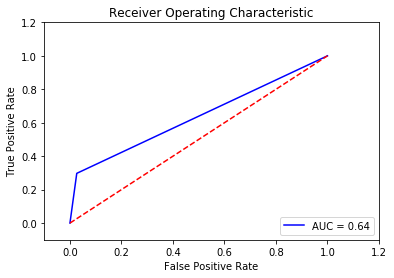

In [169]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()